In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\src")
    sys.path.append(module_path+"\\References")

In [2]:
import data_manipulation
from data_dictionary import dictionary
import data_visualization
import data_preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_row', 120)
pd.set_option('display.max_column', 70)

In [4]:
import seaborn as sns

In [5]:
original_data_file_name = 'SEERA dataset original raw data'

In [6]:
original_data = data_manipulation.read_data(original_data_file_name, header = 1)
original_data

,ProjID,Year of project,Organization id,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Estimated duration,Actual duration,% project gain (loss),Development type,Application domain,Object points,Other sizing method,Estimated size,Estimated effort,Actual effort,Contract maturity,Government policy impact,Economic instability impact,Organization management structure clarity,Developer hiring policy,Developer incentives policy,Developer training,Development team management,Top management support,Top management opinion of previous system,Clarity of manual system,User resistance,User computer experience,Users stability,Requirment stability,Requirements flexibility,Project manager experience,...,Analysts capability,Team selection,Team size,Dedicated team members,Daily working hours,Team contracts,Team continuity,Team cohesion,Income satisfaction,Schedule quality,Development environment adequacy,Tool availability,Methodology,Multiple programing languages,Programming language used,DBMS used,Technical stability,Open source software,Level of outsourcing,Outsourcing impact,Degree of software reuse,Degree of risk management,Use of standards,Degree of standards usage,Process reengineering,Requirement accuracy level,Technical documentation,Comments within the code,User manual,Required reusability,Performance requirements,Product complexity,Security requirements,Reliability requirements,Specified H/W
0,1,2015,1,1,1,16,7,13,2.00,3.0,?,1,7,100,2,NaN,2112,3168.0,8,4,1,2,1,8,3,4,4,1,2,1.75,2,1.888889,2.587302,4.555556,2,...,1,3,6,6,8,1,16.6667,2,3,2,1,7,2,1,1,1,1,1,3,NaN,5,3,3,NaN,1.88889,?,1,3,1,1,1,2,2,3,1
1,2,2016,25,5,1,2,1,2,2.00,3.0,?,1,3,19,2,NaN,1056,1584.0,4,4,3,1,2,6,3,7,4,1,4,2.50,2,1.888889,2.904762,4.555556,1,...,2,3,3,3,8,1,0,6,4,2,1,8,1,2,5,1,1,1,3,NaN,5,3,3,NaN,4.55556,2,2,2,1,4,1,1,4,2,1
2,3,2008,2,5,3,2,2,3,3.00,5.0,0,1,3,64,3,50.0,3168,5280.0,4,5,2,3,4,6,3,6,1,0,6,2.00,2,1.888889,1.000000,1.888889,2,...,2,2,6,6,8,1,0,5,2,1,1,8,3,1,3,1,1,0,3,NaN,5,2,3,NaN,1.44444,3,2,2,2,3,4,3,5,2,3
3,4,2009,42,4,2,3,2,4,6.00,6.0,-0.166667,1,7,246,5,70.0,5280,5280.0,2,4,1,1,1,4,3,6,4,1,3,3.25,2,5.000000,2.507937,1.000000,1,...,4,2,6,4,8,2,0,1,2,1,1,4,2,1,4,2,2,0,1,1,3,1,2,6,1.44444,1,1,3,4,3,2,4,3,4,2
4,5,2016,42,4,2,3,2,4,12.00,24.0,-0.174444,1,7,420,5,120.0,19008,38016.0,3,4,3,1,2,3,3,2,4,1,3,2.75,2,1.888889,4.650794,1.000000,1,...,4,3,9,9,8,1,44.4444,2,3,1,1,4,2,3,24,2,1,0,3,NaN,3,1,3,NaN,1,1,1,3,4,3,4,3,3,4,2
5,6,2012,42,4,2,3,2,4,6.00,8.0,0,4,7,177,5,76.0,7392,9856.0,3,4,2,1,2,3,3,2,4,0,2,1.75,3,4.555556,4.412698,1.000000,1,...,4,3,7,7,8,1,14.2857,1,2,1,1,4,2,1,4,3,1,0,3,NaN,3,1,3,NaN,1,1,1,3,4,3,4,3,3,4,2
6,7,2016,42,4,1,3,1,4,6.00,9.0,0,1,7,54,5,5.0,5280,7920.0,3,4,1,1,2,4,2,2,4,0,4,3.50,1,5.000000,3.380952,1.000000,2,...,4,3,5,5,8,2,0,1,2,1,1,4,2,1,6,3,1,0,1,1,5,1,3,NaN,1,1,1,2,4,3,4,4,3,4,2
7,8,2018,42,4,4,3,2,4,4.00,4.0,?,1,7,71,5,50.0,4400,4400.0,3,5,2,1,2,4,2,2,4,0,3,4.00,2,1.888889,2.666667,1.000000,2,...,4,3,5,5,10,1,0,1,2,1,1,4,3,3,25,3,3,0,3,NaN,2,1,3,NaN,1,1,1,3,2,3,4,4,4,4,2
8,9,2018,42,4,4,3,1,4,6.00,6.0,0,1,3,14,5,5.0,4224,4224.0,3,5,1,1,2,3,3,2,4,0,3,2.25,2,1.888889,1.714286,1.888889,1,...,4,3,4,4,8,1,0,1,2,1,1,8,2,1,2,3,1,0,3,NaN,3,1,3,NaN,1.44444,1,1,2,4,1,4,4,3,4,2
9,10,2015,3,5,2,1,1,14,12.00,45.0,0,1,2,335,4,6.0,6468,24255.0,4,5,2,1,3,4,1,6,5,1,3,3.75,1,4.555556,2.507937,4.555556,1,...,1,3,4,3,7,1,0,1,1,3,1,8,3,1,4,2,1,0,3,NaN,5,3,3,NaN,1.44444,?,4,3,4,3,1,1,2,2,2


In [7]:
data = original_data.copy()

In [8]:
data = data.set_index('ProjID')
data = data.drop('Organization id', axis = 1)
data

,Year of project,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Estimated duration,Actual duration,% project gain (loss),Development type,Application domain,Object points,Other sizing method,Estimated size,Estimated effort,Actual effort,Contract maturity,Government policy impact,Economic instability impact,Organization management structure clarity,Developer hiring policy,Developer incentives policy,Developer training,Development team management,Top management support,Top management opinion of previous system,Clarity of manual system,User resistance,User computer experience,Users stability,Requirment stability,Requirements flexibility,Project manager experience,Consultant availability,DBMS expert availability,...,Analysts capability,Team selection,Team size,Dedicated team members,Daily working hours,Team contracts,Team continuity,Team cohesion,Income satisfaction,Schedule quality,Development environment adequacy,Tool availability,Methodology,Multiple programing languages,Programming language used,DBMS used,Technical stability,Open source software,Level of outsourcing,Outsourcing impact,Degree of software reuse,Degree of risk management,Use of standards,Degree of standards usage,Process reengineering,Requirement accuracy level,Technical documentation,Comments within the code,User manual,Required reusability,Performance requirements,Product complexity,Security requirements,Reliability requirements,Specified H/W
ProjID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2015,1,1,16,7,13,2.00,3.0,?,1,7,100,2,NaN,2112,3168.0,8,4,1,2,1,8,3,4,4,1,2,1.75,2,1.888889,2.587302,4.555556,2,3,0,...,1,3,6,6,8,1,16.6667,2,3,2,1,7,2,1,1,1,1,1,3,NaN,5,3,3,NaN,1.88889,?,1,3,1,1,1,2,2,3,1
2,2016,5,1,2,1,2,2.00,3.0,?,1,3,19,2,NaN,1056,1584.0,4,4,3,1,2,6,3,7,4,1,4,2.50,2,1.888889,2.904762,4.555556,1,3,0,...,2,3,3,3,8,1,0,6,4,2,1,8,1,2,5,1,1,1,3,NaN,5,3,3,NaN,4.55556,2,2,2,1,4,1,1,4,2,1
3,2008,5,3,2,2,3,3.00,5.0,0,1,3,64,3,50.0,3168,5280.0,4,5,2,3,4,6,3,6,1,0,6,2.00,2,1.888889,1.000000,1.888889,2,2,1,...,2,2,6,6,8,1,0,5,2,1,1,8,3,1,3,1,1,0,3,NaN,5,2,3,NaN,1.44444,3,2,2,2,3,4,3,5,2,3
4,2009,4,2,3,2,4,6.00,6.0,-0.166667,1,7,246,5,70.0,5280,5280.0,2,4,1,1,1,4,3,6,4,1,3,3.25,2,5.000000,2.507937,1.000000,1,1,1,...,4,2,6,4,8,2,0,1,2,1,1,4,2,1,4,2,2,0,1,1,3,1,2,6,1.44444,1,1,3,4,3,2,4,3,4,2
5,2016,4,2,3,2,4,12.00,24.0,-0.174444,1,7,420,5,120.0,19008,38016.0,3,4,3,1,2,3,3,2,4,1,3,2.75,2,1.888889,4.650794,1.000000,1,2,1,...,4,3,9,9,8,1,44.4444,2,3,1,1,4,2,3,24,2,1,0,3,NaN,3,1,3,NaN,1,1,1,3,4,3,4,3,3,4,2
6,2012,4,2,3,2,4,6.00,8.0,0,4,7,177,5,76.0,7392,9856.0,3,4,2,1,2,3,3,2,4,0,2,1.75,3,4.555556,4.412698,1.000000,1,3,1,...,4,3,7,7,8,1,14.2857,1,2,1,1,4,2,1,4,3,1,0,3,NaN,3,1,3,NaN,1,1,1,3,4,3,4,3,3,4,2
7,2016,4,1,3,1,4,6.00,9.0,0,1,7,54,5,5.0,5280,7920.0,3,4,1,1,2,4,2,2,4,0,4,3.50,1,5.000000,3.380952,1.000000,2,1,1,...,4,3,5,5,8,2,0,1,2,1,1,4,2,1,6,3,1,0,1,1,5,1,3,NaN,1,1,1,2,4,3,4,4,3,4,2
8,2018,4,4,3,2,4,4.00,4.0,?,1,7,71,5,50.0,4400,4400.0,3,5,2,1,2,4,2,2,4,0,3,4.00,2,1.888889,2.666667,1.000000,2,2,0,...,4,3,5,5,10,1,0,1,2,1,1,4,3,3,25,3,3,0,3,NaN,2,1,3,NaN,1,1,1,3,2,3,4,4,4,4,2
9,2018,4,4,3,1,4,6.00,6.0,0,1,3,14,5,5.0,4224,4224.0,3,5,1,1,2,3,3,2,4,0,3,2.25,2,1.888889,1.714286,1.888889,1,1,1,...,4,3,4,4,8,1,0,1,2,1,1,8,2,1,2,3,1,0,3,NaN,3,1,3,NaN,1.44444,1,1,2,4,1,4,4,3,4,2


In [9]:
data.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [10]:
data.describe()

,Year of project,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Estimated duration,Actual duration,Development type,Application domain,Other sizing method,Estimated size,Estimated effort,Actual effort,Contract maturity,Economic instability impact,Top management support,Top management opinion of previous system,User resistance,User computer experience,Users stability,Requirment stability,Requirements flexibility,DBMS expert availability,Team size,Dedicated team members,Daily working hours,Methodology,Multiple programing languages,Programming language used,DBMS used,Open source software
count,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,13.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2011.958333,4.550000,1.97500,7.841667,4.366667,7.941667,5.670833,10.375000,1.516667,4.30000,2.241667,13707.846154,5225.183333,9060.929167,4.341667,1.958333,3.675000,0.625000,2.612500,1.575000,3.137037,2.653439,2.548148,0.708333,5.741667,4.266667,8.258333,2.283333,1.191667,7.433333,2.541667,0.341667
std,6.267692,1.358756,1.05689,6.201106,4.134165,4.784948,3.685793,8.903604,0.987173,2.35004,0.819877,44289.853819,6881.106926,12598.482007,1.621784,1.252868,1.131389,0.486153,0.777743,0.617157,1.354082,1.102471,1.367120,0.456435,6.343787,6.446592,1.600923,1.278019,0.472715,4.351631,1.352842,0.476257
min,1993.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.250000,0.500000,1.000000,1.00000,1.000000,5.000000,176.000000,396.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.888889,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2008.750000,4.000000,1.00000,3.000000,1.000000,3.000000,3.000000,5.000000,1.000000,2.00000,2.000000,7.000000,1278.750000,2112.000000,3.000000,1.000000,4.000000,0.000000,2.000000,1.000000,1.888889,1.634921,1.444444,0.000000,3.000000,1.000000,8.000000,1.000000,1.000000,6.000000,2.000000,0.000000
50%,2014.000000,5.000000,2.00000,4.500000,2.000000,10.000000,5.000000,8.000000,1.000000,5.00000,2.000000,50.000000,2860.000000,4576.000000,4.000000,1.000000,4.000000,1.000000,2.500000,2.000000,1.888889,2.746032,1.888889,1.000000,5.000000,3.000000,8.000000,2.000000,1.000000,7.000000,2.000000,0.000000
75%,2017.000000,5.000000,2.00000,16.000000,8.000000,13.000000,7.000000,12.000000,1.250000,7.00000,2.000000,76.000000,6336.000000,10032.000000,5.000000,3.000000,4.000000,1.000000,3.000000,2.000000,4.555556,3.539683,4.111111,1.000000,6.000000,5.000000,8.000000,3.000000,1.000000,9.000000,3.000000,1.000000
max,2019.000000,8.000000,8.00000,17.000000,12.000000,17.000000,20.000000,48.000000,4.000000,7.00000,5.000000,160236.000000,50688.000000,79200.000000,8.000000,7.000000,5.000000,1.000000,4.750000,3.000000,5.000000,4.809524,5.000000,1.000000,48.000000,48.000000,14.000000,7.000000,3.000000,25.000000,5.000000,1.000000


In [11]:
general_information_columns = ['Role in organization', 'Organization type']

# Data Pre-Processing

## Missing values


In [12]:
#In our project, missing values are represented with a '?', so we have to replace this value with a np.nan
data = data_preprocessing.define_missing_values(data)

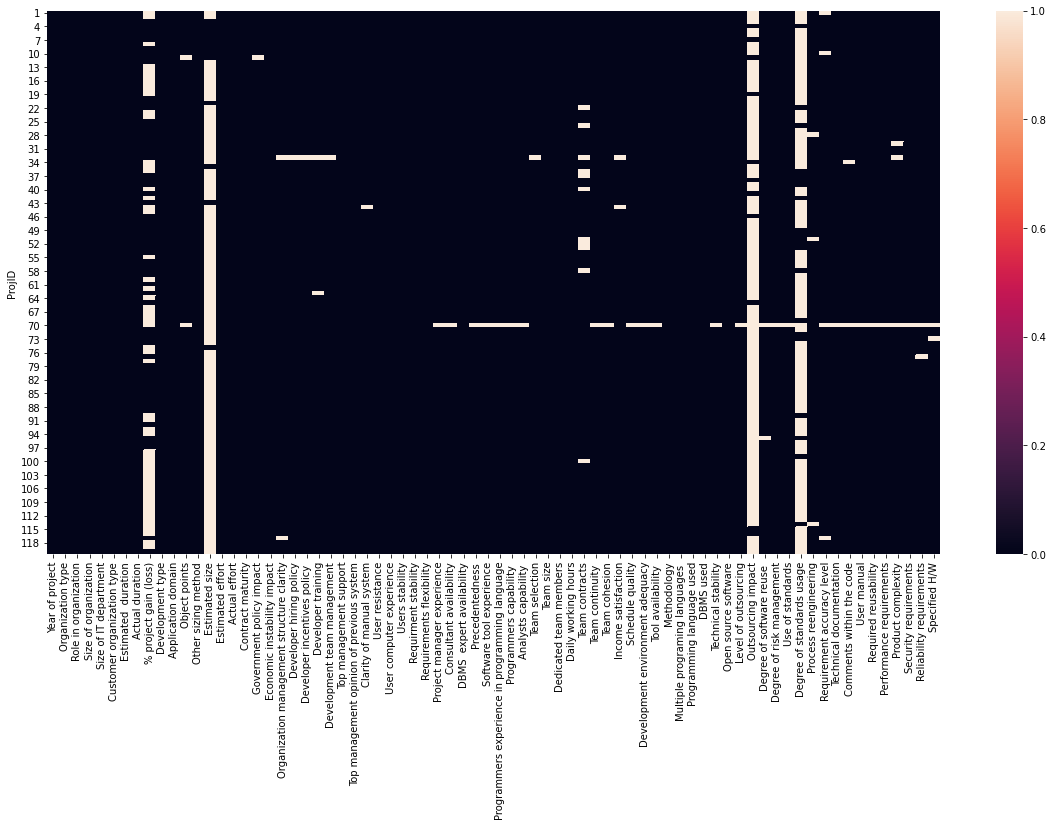

In [13]:
plt.figure(figsize = (20, 10))
data_visualization.missing_values_map(data)

In [14]:
#These are the missing values rates for each column in our dataset
missing_values_rates = data_visualization.nan_columns_rates(data)
missing_values_rates

Outsourcing impact                                0.908333
Estimated size                                    0.891667
Degree of standards usage                         0.825000
% project gain (loss)                             0.466667
Team contracts                                    0.091667
Requirement accuracy level                        0.033333
Product complexity                                0.025000
Process reengineering                             0.025000
Specified H/W                                     0.016667
Income satisfaction                               0.016667
Reliability requirements                          0.016667
Developer training                                0.016667
Degree of software reuse                          0.016667
Organization management structure clarity         0.016667
Comments within the code                          0.016667
Object points                                     0.016667
Developer incentives policy                       0.0083

In [15]:
#We will drop all columns that have more than 40% missing values, and store the new dataset in a variable
data = data_preprocessing.drop_missing_values_cols(data, 0.4)

In [16]:
data.shape

(120, 70)

In [17]:
rows_rates = data_visualization.nan_rows_rates(data)
rows_rates

ProjID
70     0.400000
33     0.128571
11     0.028571
117    0.028571
51     0.028571
44     0.028571
1      0.014286
26     0.014286
30     0.014286
34     0.014286
36     0.014286
37     0.014286
73     0.014286
77     0.014286
40     0.014286
95     0.014286
63     0.014286
52     0.014286
53     0.014286
58     0.014286
22     0.014286
28     0.014286
10     0.014286
100    0.014286
114    0.014286
46     0.000000
41     0.000000
8      0.000000
42     0.000000
43     0.000000
7      0.000000
6      0.000000
45     0.000000
48     0.000000
47     0.000000
39     0.000000
49     0.000000
5      0.000000
50     0.000000
4      0.000000
3      0.000000
2      0.000000
9      0.000000
19     0.000000
20     0.000000
38     0.000000
21     0.000000
18     0.000000
23     0.000000
24     0.000000
25     0.000000
17     0.000000
27     0.000000
55     0.000000
29     0.000000
16     0.000000
31     0.000000
32     0.000000
15     0.000000
14     0.000000
35     0.000000
13     0.000000
1

In [21]:
data = data_preprocessing.drop_missing_values_rows(data, 0.4)
data.shape

(119, 70)

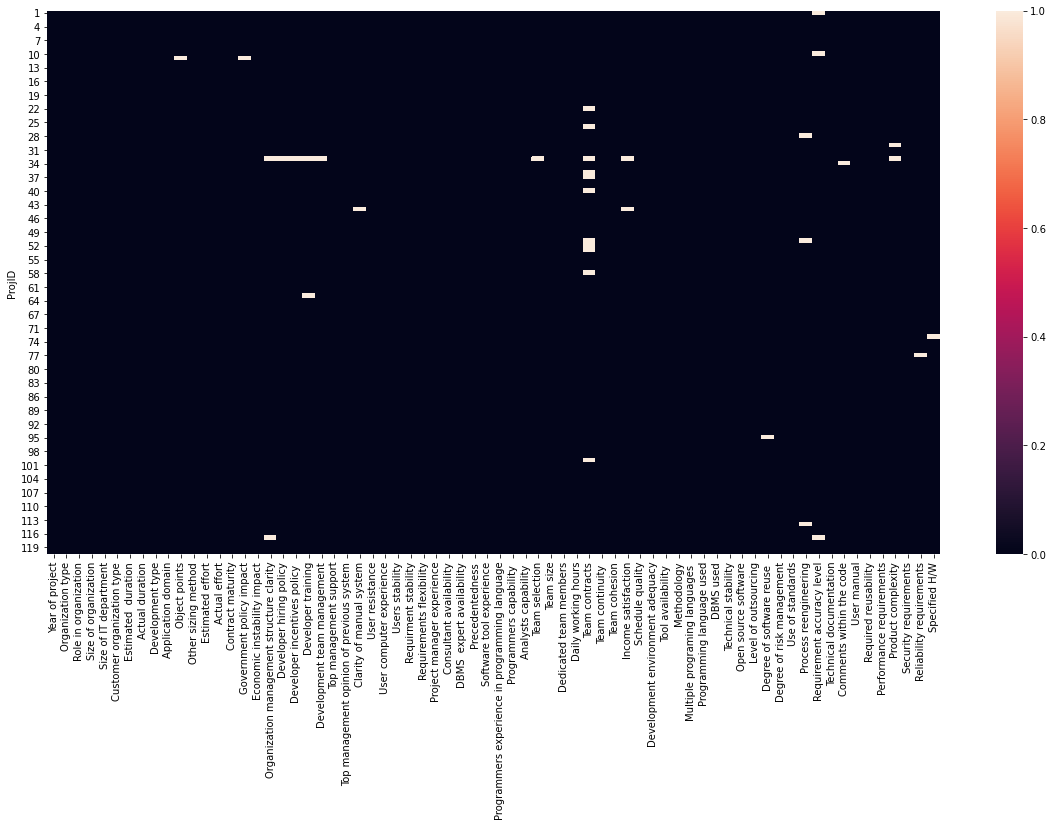

In [22]:
plt.figure(figsize = (20, 10))
data_visualization.missing_values_map(data)

Index(['Object points', 'Government policy impact',
       'Organization management structure clarity', 'Developer hiring policy',
       'Developer incentives policy ', 'Developer training',
       'Development team management', 'Clarity of manual system',
       'Team selection', 'Team contracts', 'Income satisfaction',
       'Degree of software reuse ', 'Process reengineering',
       'Requirement accuracy level', 'Comments within the code',
       'Product complexity', 'Reliability requirements', 'Specified H/W'],
      dtype='object')

In [20]:
"""for col in general_information_columns:
    if data[col].dtype in  ['object', 'int64']:
        figure = plt.figure(figsize = (10, 10))
        figure.patch.set_facecolor('white')
        data_visualization.pie_plot(data[col], dictionary(col))"""

"for col in general_information_columns:\n    if data[col].dtype in  ['object', 'int64']:\n        figure = plt.figure(figsize = (10, 10))\n        figure.patch.set_facecolor('white')\n        data_visualization.pie_plot(data[col], dictionary(col))"